<a href="https://colab.research.google.com/github/GerardoMunoz/Vision/blob/main/image_manipulation%20/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Filters Demonstration
Using the image at: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg

We will apply various filters (blurring, sharpening, edge detection, etc.) and compare results.

## Common Filter Kernels in OpenCV

| **Filter Name** | **Kernel (Matrix)** | **Description / Effect** |
|------------------|----------------------|---------------------------|
| **Identity** | $\begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$ | Returns the original image (no change). |
| **Box Blur (Averaging)** | $\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$ | Averages neighboring pixels → smooths image and removes noise. |
| **Gaussian Blur (3×3)** | $\frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}$ | Smooths while preserving edges better than box blur. |
| **Sharpening** | $\begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$ | Enhances edges and details; increases contrast locally. |
| **Edge Detection (Sobel X)** | $\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$ | Detects vertical edges (horizontal intensity changes). |
| **Edge Detection (Sobel Y)** | $\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$ | Detects horizontal edges (vertical intensity changes). |
| **Prewitt X** | $\begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}$ | Simpler version of Sobel X. |
| **Prewitt Y** | $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}$ | Simpler version of Sobel Y. |
| **Laplacian (3×3)** | $\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$ | Detects edges by measuring second derivative (highlights rapid intensity changes). |
| **Emboss** | $\begin{bmatrix} -2 & -1 & 0 \\ -1 & 1 & 1 \\ 0 & 1 & 2 \end{bmatrix}$ | Creates a 3D-like raised/embossed effect. |
| **Edge Enhancement (Alternative)** | $\begin{bmatrix} -1 & -1 & -1 \\ -1 & 9 & -1 \\ -1 & -1 & -1 \end{bmatrix}$ | Strong sharpening effect; highlights edges aggressively. |


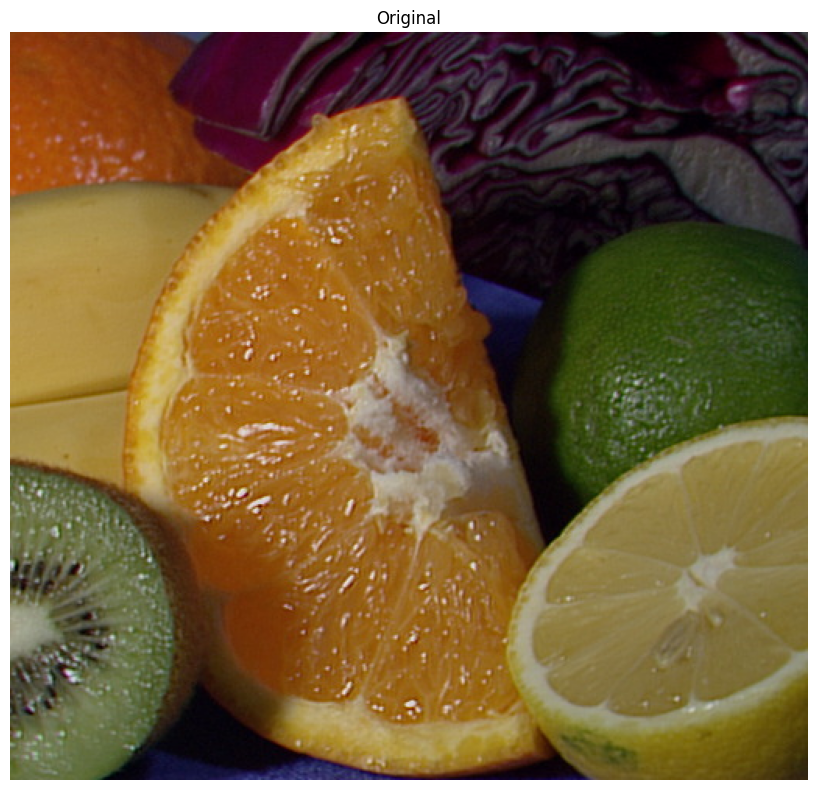

In [1]:
# Setup: import libraries & load image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image from URL
import urllib.request
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg"
resp = urllib.request.urlopen(url)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image_data, cv2.IMREAD_COLOR)  # BGR format

# Convert BGR → RGB for plotting with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Utility function to display images side by side
def show_images(titles, images, cmap=None, size=(15, 8)):
    n = len(images)
    plt.figure(figsize=size)
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.title(titles[i])
        if cmap:
            plt.imshow(images[i], cmap=cmap)
        else:
            plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Let us display the original image
show_images(["Original"], [img_rgb])

## 1. Basic Smoothing / Blurring Filters

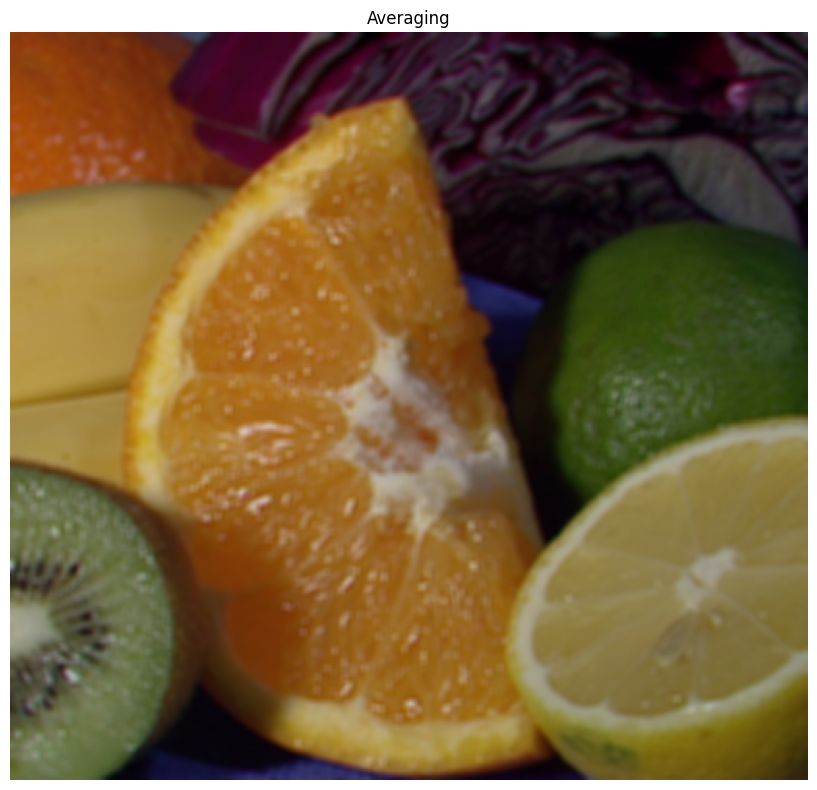

In [9]:
blur = cv2.blur(img, (5,5))  # averaging filter
gauss = cv2.GaussianBlur(img, (7,7), sigmaX=1.5)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Convert to RGB for display
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
gauss_rgb = cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB)
median_rgb = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)
bilateral_rgb = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

show_images(
    [ "Averaging"],
    [blur_rgb]
)


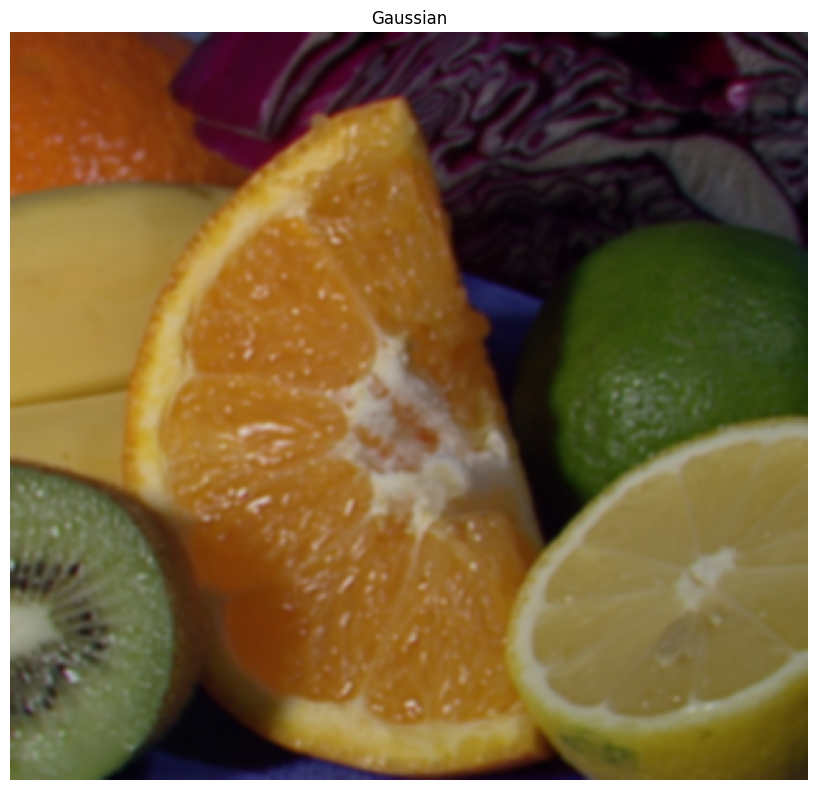

In [10]:
show_images(
    ["Gaussian", ],
    [gauss_rgb, ]
)


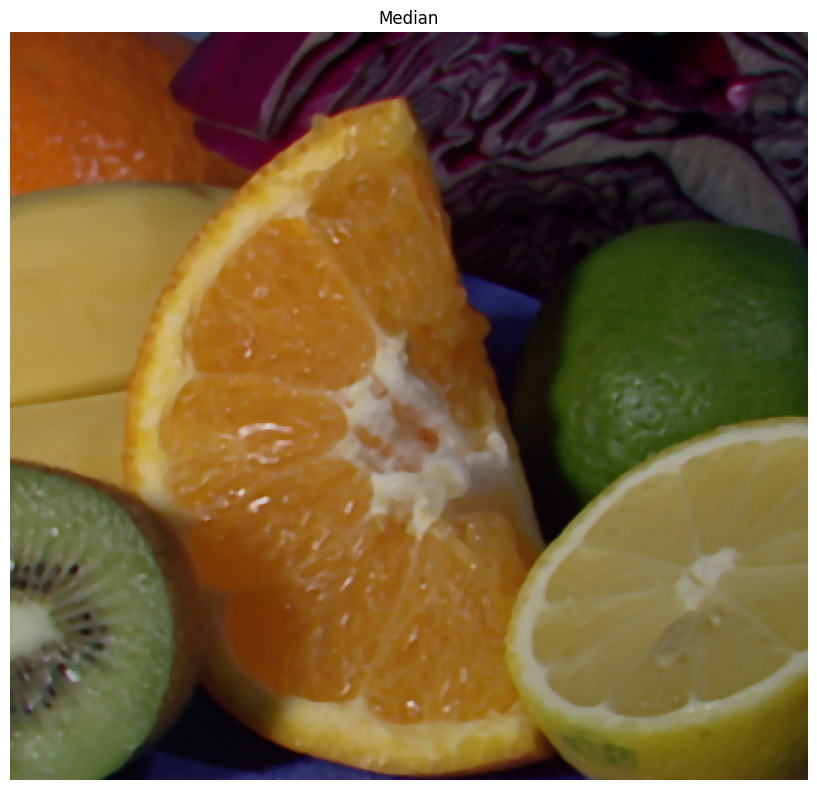

In [11]:
show_images(
    ["Median",],
    [ median_rgb,]
)


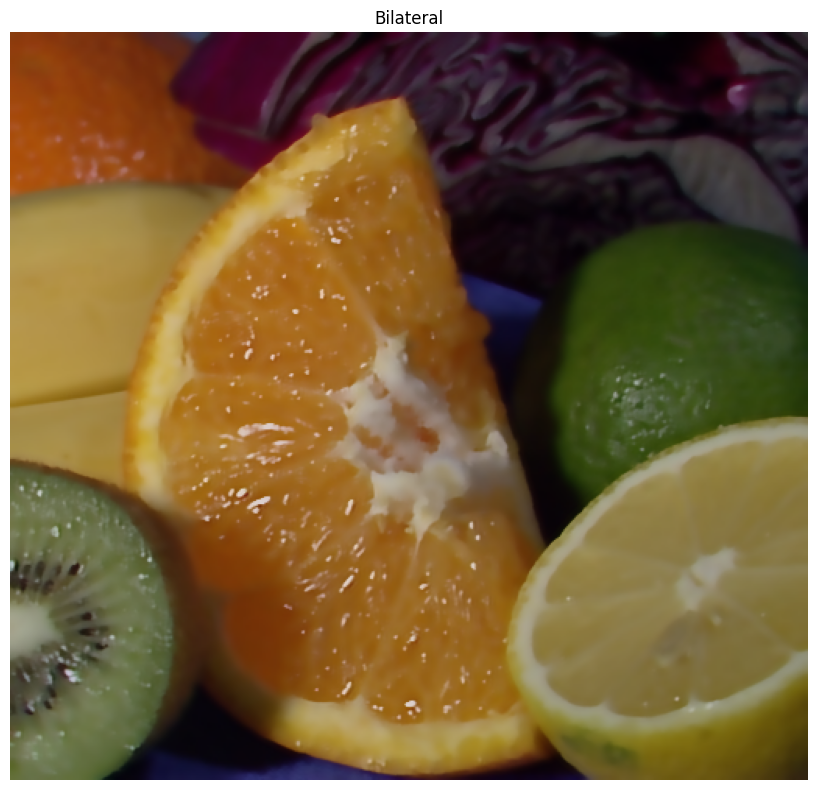

In [12]:
show_images(
    ["Bilateral"],
    [ bilateral_rgb]
)


## 2. Edge Detection / High-pass / Derivative Filters

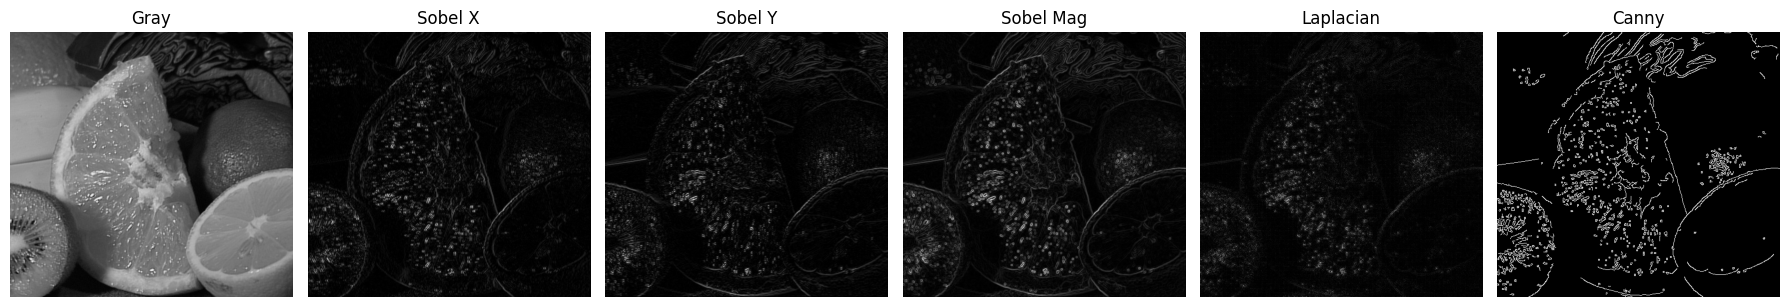

In [3]:
# First convert to grayscale (many edge filters work on single channel)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel in x and y
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.magnitude(sobelx, sobely)

# Laplacian
lap = cv2.Laplacian(gray, cv2.CV_64F)

# Canny
canny = cv2.Canny(gray, threshold1=100, threshold2=200)

# For display: normalize (where needed) and convert to uint8
def to_uint8(imgf):
    imgf = np.absolute(imgf)
    imgf = imgf / np.max(imgf) * 255
    return imgf.astype(np.uint8)

sobelx_u = to_uint8(sobelx)
sobely_u = to_uint8(sobely)
sobel_mag_u = to_uint8(sobel_mag)
lap_u = to_uint8(lap)

show_images(
    ["Gray", "Sobel X", "Sobel Y", "Sobel Mag", "Laplacian", "Canny"],
    [gray, sobelx_u, sobely_u, sobel_mag_u, lap_u, canny],
    cmap='gray', size=(18, 6)
)


## 3. Sharpening / Custom Kernel Filter

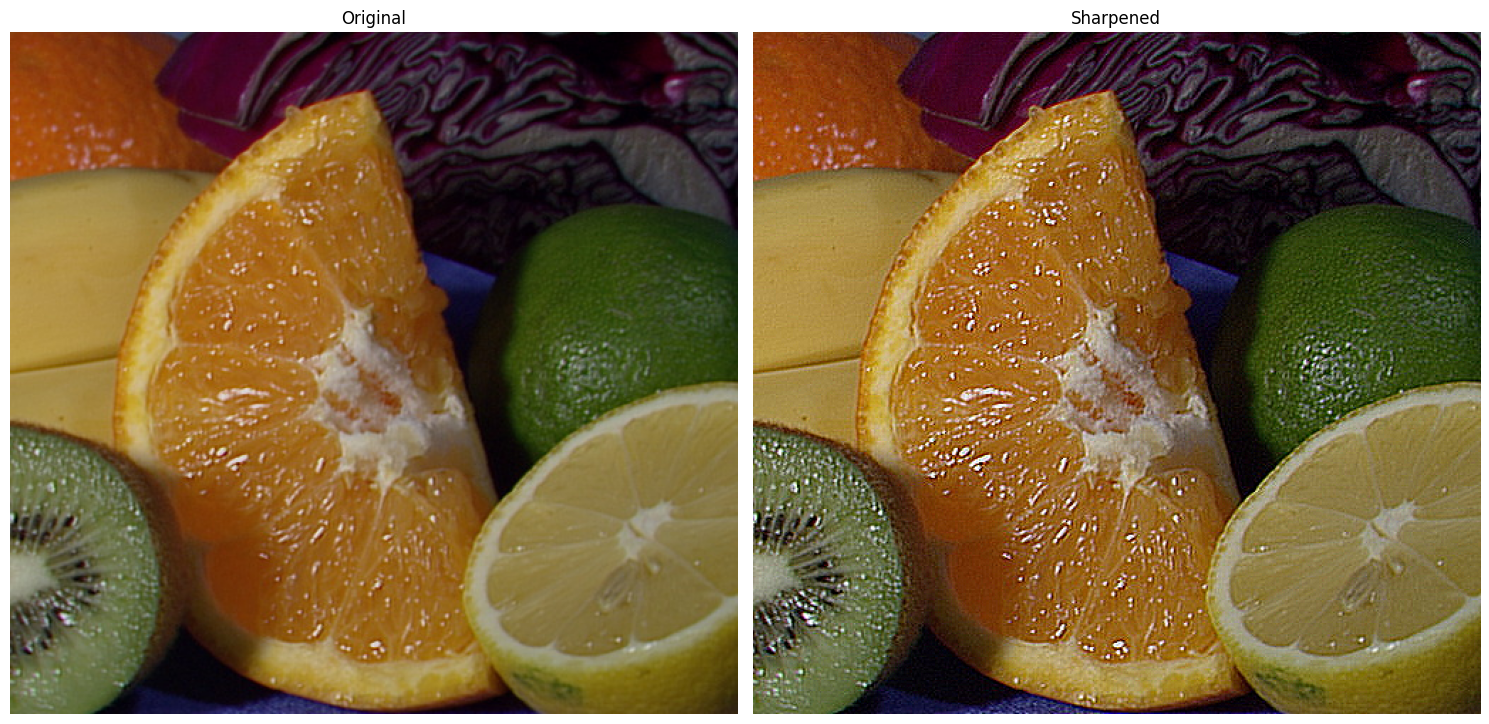

In [8]:
# Define a sharpening kernel
kernel_sharp = np.array([[ 0, -1,  0],
                         [-1,  4, -1],
                         [ 0, -1,  0]])
kernel_sharp = np.array([[ 0, -1,  0],
                         [-1,  4, -1],
                         [ 0, -1,  0]])
sharpened = cv2.filter2D(img, -1, kernel_sharp)
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)

show_images(["Original", "Sharpened"], [img_rgb, sharpened_rgb])


## 4. (Optional) Additional Filters / Techniques
You can also try:
- Bilateral + edge combining
- Unsharp masking (via Gaussian blur subtraction)
- Morphological filters (erosion, dilation)
- Frequency domain filtering (FFT) etc.
